<a href="https://colab.research.google.com/github/balakrishna15/ML-Projects/blob/main/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

What is regression?

we would predict a single response variable y (also referred as dependent variable), based on one or more feature variables x1, . . ., xk (also referred as independent variable(s)) and the relationship between them. When the response variable takes continuous numerical values, the prediction process is called regression.

A linear relationship might not always be able to provide accurate predictions at all instances. So, we include a random error ϵ in the above relationship.  Hence, we can say

y = β0 + β1x1 +・・・+ βkxk+ ϵ

Assumptions of Linear Regression

Assumption 1: The target (dependent) variable and the predictor (independent) variables should be continuous numerical values.

Assumption 2: There should be linear relationship between the predictor variable and the target variable. A scatterplot with the predictor and the target variables along the x-axis and the y-axis, can be used as a simple check to validate this assumption.

Assumption 3: There should not be any significant outliers in the data.

Assumption 4: The data is iid (Independent and identically distributed). In other words, one observation should not depend on another.

Assumption 5: The residuals (difference between the actual value and predicted value) of a regression should not exhibit any pattern.  That is, they should be homoscedastic (exhibit equal variance across all instances). This assumption can be validated by plotting a scatter plot of the residuals. If the residuals exhibit a pattern, then they are not homoscedastic (in other words, they are heteroscedastic). If the residuals are randomly distributed, then it is homoscedastic in nature.

Assumption 6: The residuals of the regression line should be approximately normally distributed. The assumption can be checked by plotting a Normal Q-Q plot on the residuals.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
computers = pd.read_csv("/content/computers.csv")



In [ ]:
computers.describe()

,Units,Minutes
count,14.000000,14.000000
mean,6.000000,97.214286
std,2.961289,46.217177
min,1.000000,23.000000
25%,4.000000,66.500000
50%,6.000000,96.500000
75%,8.750000,138.500000
max,10.000000,166.000000


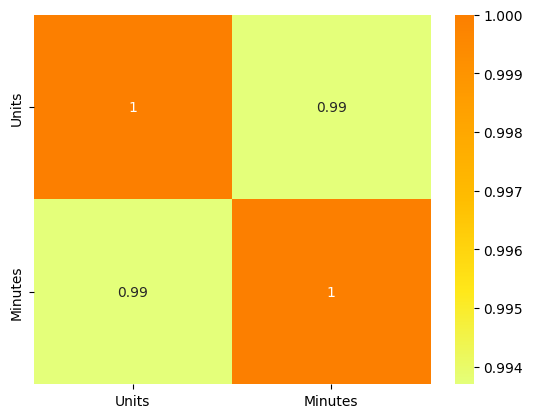

In [ ]:
corr = computers.corr()
sns.heatmap(corr, cmap = 'Wistia', annot= True);

In [ ]:
computers.head(14)

,Units,Minutes
0,1,23
1,2,29
2,3,49
3,4,64
4,4,74
5,5,87
6,6,96
7,6,97
8,7,109
9,8,119


In [ ]:
computers.shape

In [ ]:
x = computers['Units']
y = computers['Minutes']

### Plotting the actual time taken for various values of number of faulty units.

Text(0.5, 1.0, 'Minutes vs. Units')

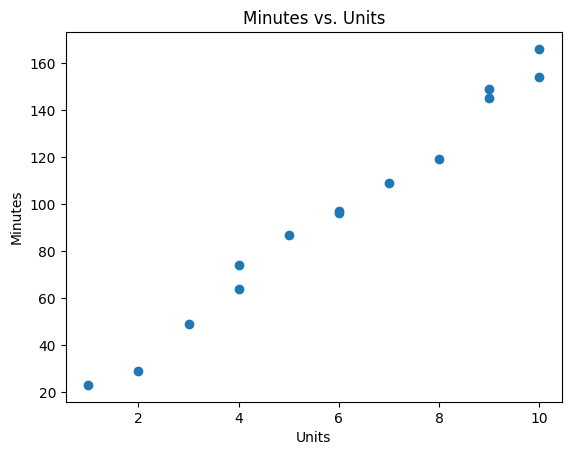

In [ ]:
plt.scatter(computers['Units'], computers['Minutes'])
plt.xlabel('Units')
plt.ylabel('Minutes')
plt.title("Minutes vs. Units")

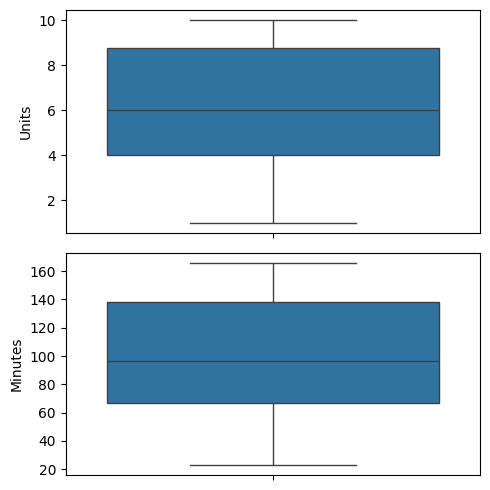

In [ ]:
fig, axs = plt.subplots(2, figsize = (5,5))
plt1 = sns.boxplot(computers['Units'], ax = axs[0])
plt2 = sns.boxplot(computers['Minutes'], ax = axs[1])
plt.tight_layout()


<ipython-input-18-c187e9d0ae3a>:1: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "o:b" (-> linestyle=':'). The keyword argument will take precedence.
  plt.plot(x,y, 'o:b', ls="dotted", mfc = "r",lw='3')


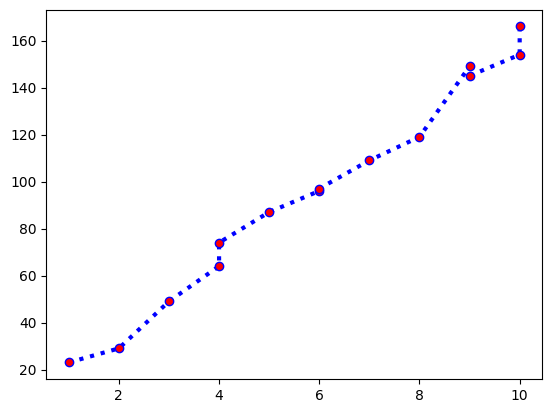

In [ ]:
plt.plot(x,y, 'o:b', ls="dotted", mfc = "r",lw='3')

From the above graph, there appears to be a linear relationship between the two variables. We also infer that, there are no significant outliers in the data. Also, all the observations are independent of one another. Thus, a simple linear regression model seems to be a good choice for this problem, which can be written as –

Time taken to repair a computer = β0 + (β1 * Units being replaced) + ε

**One of the ways to find the β0 and β1 that will give us the line of best fit is through “least squares” method.**





In [ ]:
x = computers.Units
y = computers.Minutes
xiyi = x*y
n = len(computers)
xmean = computers.Units.mean()
ymean = computers.Minutes.mean()
numerator = xiyi.sum() - n*xmean*ymean
denominator = (x**2).sum() - n*(xmean**2)
m = numerator/denominator
c = ymean - (m*xmean)
print('intercept : ',c,' coefficient : ',m)


intercept :  4.161654135338296  coefficient :  15.508771929824569


In [ ]:
# Estimating time using the intercept and the coefficient of the best fit model
min_best_fit_model = c + m*computers.Units
# Adding the predicted values to the dataset
computers['min_best_fit_model'] = min_best_fit_model
# Printing the values predicted by the best fit model
computers[["Units","Minutes","min_best_fit_model"]]

,Units,Minutes,min_best_fit_model
0,1,23,19.670426
1,2,29,35.179198
2,3,49,50.687970
3,4,64,66.196742
4,4,74,66.196742
5,5,87,81.705514
6,6,96,97.214286
7,6,97,97.214286
8,7,109,112.723058
9,8,119,128.231830


**Statsmodels** *is a Python module that provides classes and functions for the estimation of many different statistical models, as well as for conducting statistical tests, and statistical data exploration.*

In [ ]:
# building statistics model
import statsmodels.api as sm
X=sm.add_constant(computers[["Units"]])
y=computers['Minutes']
# regression model using Ordinary Least Squares
model=sm.OLS(y,X).fit()

In [ ]:
model.summary()

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Minutes   R-squared:                       0.987
Model:                            OLS   Adj. R-squared:                  0.986
Method:                 Least Squares   F-statistic:                     943.2
Date:                Wed, 15 May 2024   Prob (F-statistic):           8.92e-13
Time:                        08:51:25   Log-Likelihood:                -42.374
No. Observations:                  14   AIC:                             88.75
Df Residuals:                      12   BIC:                             90.03
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.1617      3.355      1.240      0.239      -3.148      11.472
Units         15.5088      0.505     30.712      0.000      14.409      16.609
==============================================================================
Omnibus:                        0.746   Durbin-Watson:                   2.051
Prob(Omnibus):                  0.689   Jarque-Bera (JB):                0.624
Skew:                          -0.069   Prob(JB):                        0.732
Kurtosis:                       1.975   Cond. No.                         15.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

For a significance level of 0.05, the best fit model obtained for computer repairs data has a p-value (P>[t]) of 0.000 for 'Units'(as shown above) . The null hypothesis for t-test can thus be rejected since the p-value (0.000) is less than the significance level of 0.05. Hence the predictor 'Units' has significance in the prediction of the 'Minutes' (target).

The null hypothesis for the F-test can be rejected since the p-value 8.916e-13 (as shown above) is less than the significance level of 0.05. Hence, the F-test also confirms that the obtained best fit model is significant.

In [ ]:
x=np.arange(1,101)
X=x.reshape(-1,1)
y=x**2
# Creating a linear regression model
from sklearn.linear_model import LinearRegression
model = LinearRegression()
# Fitting the model to the data i.e. building the model
model.fit(X, y)
predictions=model.predict(X)
# Fetching intercept (b0) and coefficient (b1)
print("Intercept:", model.intercept_)
print("Coefficients:",model.coef_)
#Intercept: -1717.0000000000018
#Coefficients: [101.]


Intercept: -1717.0000000000018
Coefficients: [101.]


Text(0.5, 1.0, 'Residual plot')

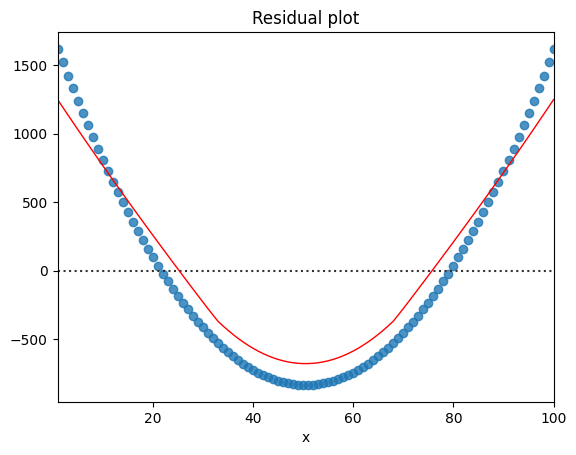

In [ ]:
import seaborn as sns
sns.residplot(x=x,y=y, lowess=True,
             line_kws={'color':'red', 'lw':1, 'alpha':1})
plt.xlabel("x")
plt.title("Residual plot")

A linear regression model is said to be valid if its errors (residuals) are normally distributed. A Normal Q-Q plot can be used to validate this assumption.

For the computers repair data set, the Q-Q plot for the residuals of the best fit model (shown below), suggests that the residuals are normally distributed since the points lie close to normal line.

Text(0.5, 1.0, 'Normal Q-Q Plot')

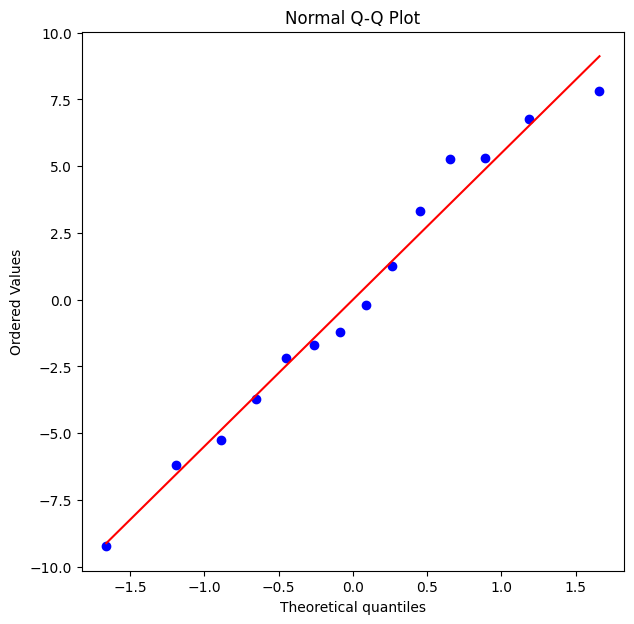

In [ ]:
from scipy import stats
residual_error=computers['Minutes']- min_best_fit_model
plt.figure(figsize=(7,7))
stats.probplot(residual_error, dist='norm', plot=plt)
plt.title("Normal Q-Q Plot")
